# Customer Segmentation Project

#### This project involved segmenting customers based on demographic and behavioral data using K-means clustering. Through analysis of clusters, key customer groups were identified, highlighting unique preferences and spending patterns. Actionable insights and targeted marketing strategies were proposed to enhance customer engagement and improve business outcomes.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### About the Data

### Loading and Understanding the Data

In [2]:
customer_data = pd.read_csv('customer_segmentation_data.csv', index_col = 'id')
customer_data.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


In [3]:
data = customer_data.copy()

In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 70.3+ KB


In [5]:
customer_data.shape

(1000, 8)

So, our dataset contains 1000 rows and 8 columns.

#### Summary Statistics

In [6]:
customer_data.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


#### Checking for missing values

In [7]:
customer_data.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

### Understanding Data Distributions and Relationships


#### Visualizing Numerical Features

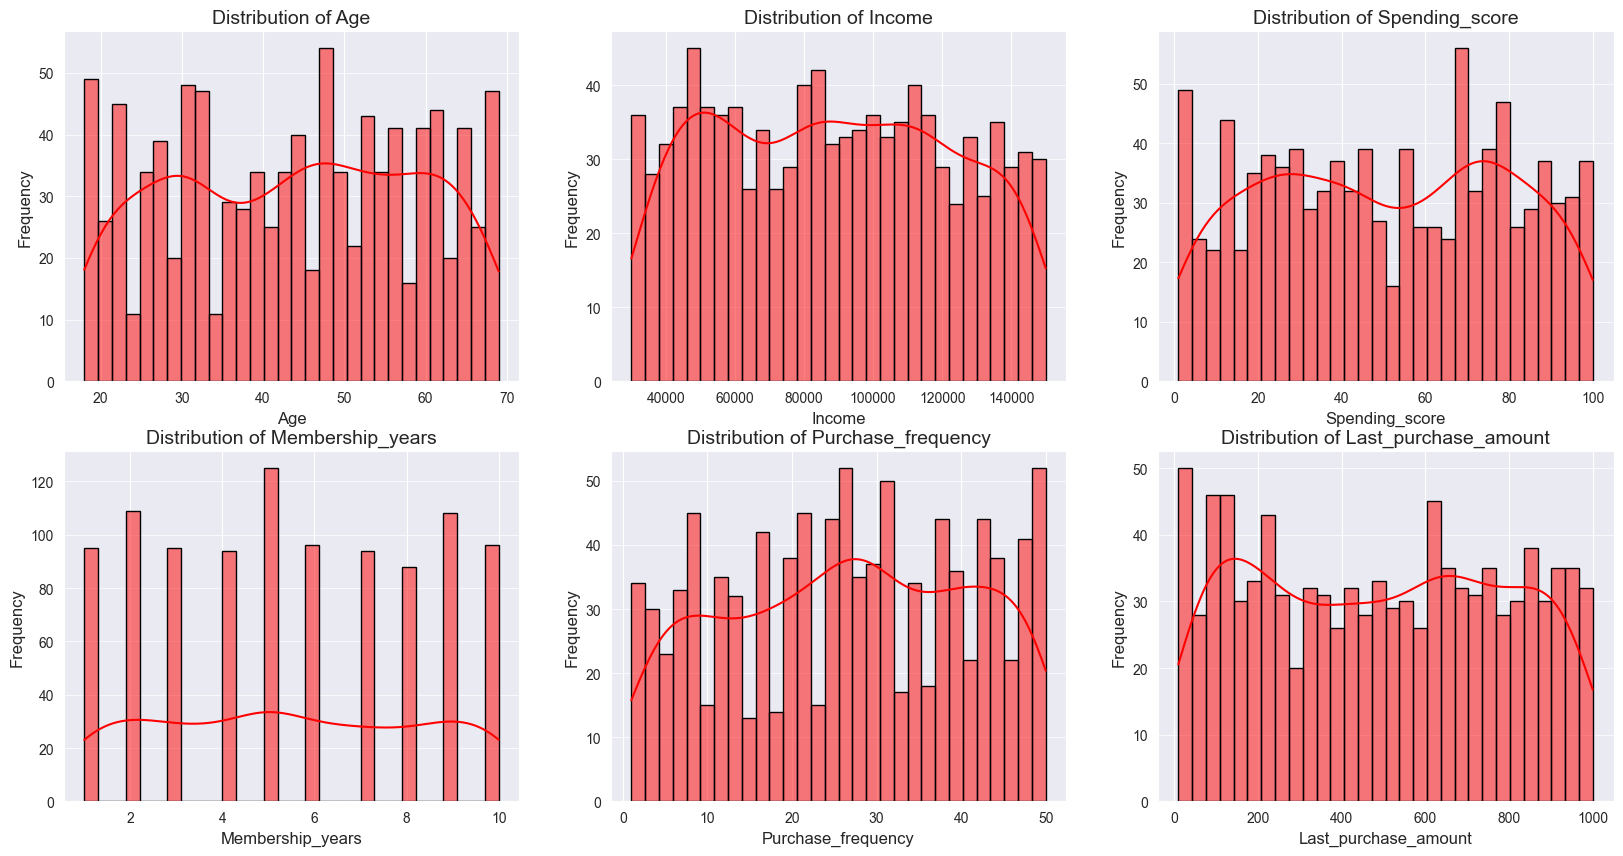

In [8]:
numeric_columns = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns, 1):  # Start the index at 1
    plt.subplot(2, 3, i)  # 2 rows, 3 columns grid
    sns.histplot(customer_data[column], kde=True, bins=30, color="red", edgecolor="black")
    plt.title(f'Distribution of {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

#### Correlation Analysis

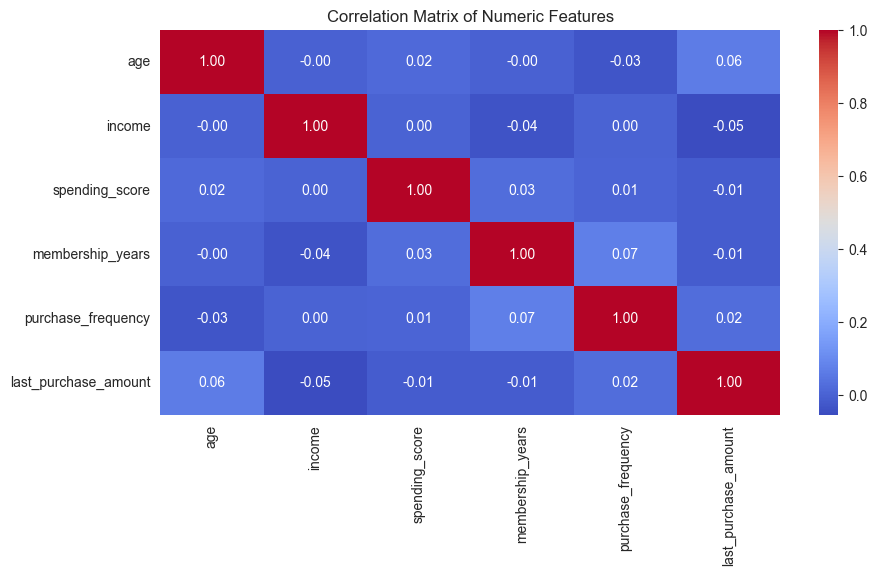

In [9]:
correlation_matrix = customer_data[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#### Visualizing Categorical Features

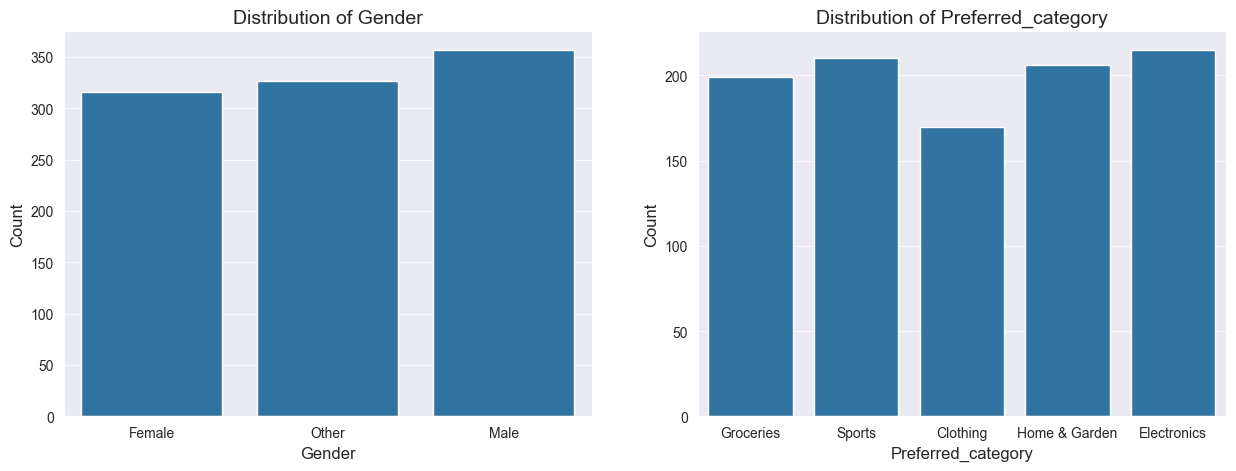

In [10]:
categorical_columns = ['gender', 'preferred_category']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(data=customer_data, x=column)
    plt.title(f'Distribution of {column.capitalize()}', fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', alpha=0.75)

### Data Preprocessing

In [11]:
# Converting Categorical features to Numerical features using One-Hot Encoding
customer_data = pd.get_dummies(customer_data, columns=['gender', 'preferred_category'], drop_first=True)
customer_data.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,38,99342,90,3,24,113.53,False,False,False,True,False,False
2,21,78852,60,2,42,41.93,False,False,False,False,False,True
3,60,126573,30,2,28,424.36,False,False,False,False,False,False
4,40,47099,74,9,5,991.93,False,True,False,False,True,False
5,65,140621,21,3,25,347.08,False,False,True,False,False,False


In [12]:
# Scaling Numerical Features
scaler = StandardScaler()
customer_data[numeric_columns] = scaler.fit_transform(customer_data[numeric_columns])

In [13]:
customer_data.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False


### Building the Model

In this project, we will use K-means clustering to segment the customers.

#### Determining the Optimal Number of Clusters (For K-Means)

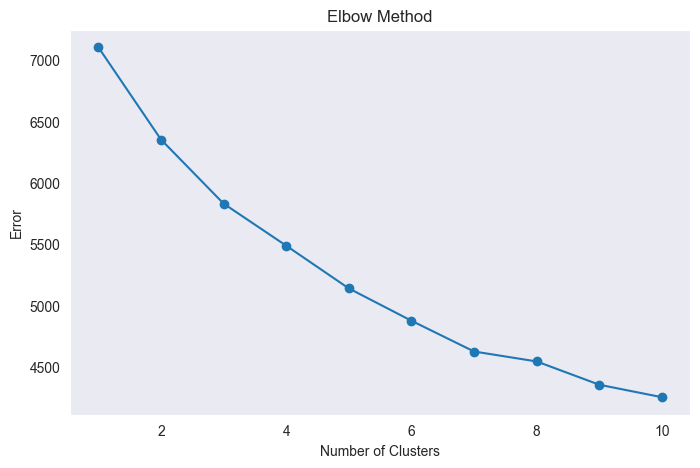

In [14]:
# Elbow method
error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(customer_data)
    error.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), error, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

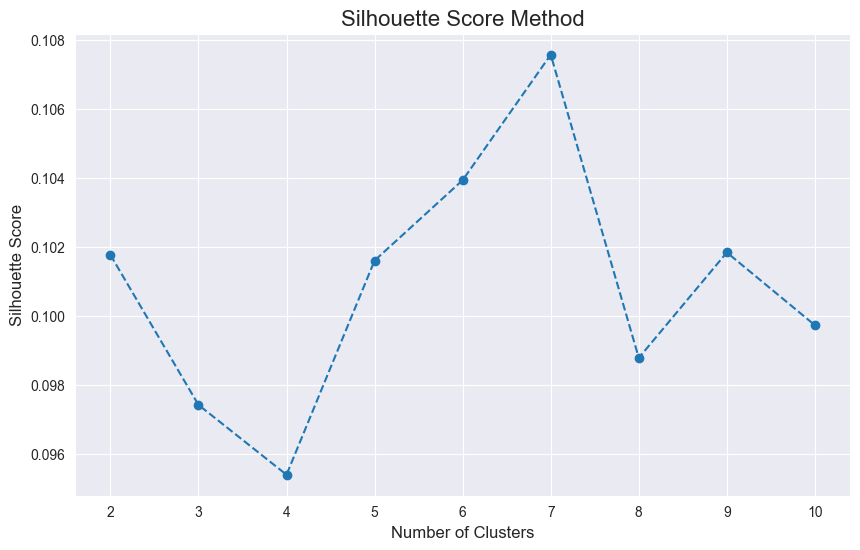

In [15]:
# Calculating Silhouette Scores
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster_range = range(2, 11) 

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(customer_data)
    score = silhouette_score(customer_data, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.show()

 I am choosing 3 clusters as the optimal number because the Elbow Method shows diminishing returns in error reduction beyond 3, ensuring both interpretability and meaningful segmentation. Additionally, 3 clusters had a relatively high silhouette score, indicating well-separated and dense clusters.

In [16]:
# Set the number of clusters
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
customer_data['Clusters'] = kmeans.fit_predict(customer_data)

cluster_summary = customer_data.groupby('Clusters').mean()


cluster_sizes = customer_data['Clusters'].value_counts()
cluster_summary['size'] = cluster_sizes

cluster_summary

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,size
Clusters,,,,,,,,,,,,,
0,-0.904672,0.067208,-0.263948,0.211907,0.560703,-0.145200,0.427692,0.258462,0.215385,0.200000,0.221538,0.206154,325
1,0.275164,0.266692,0.151012,-0.237617,-0.609634,-0.822268,0.301538,0.316923,0.209231,0.218462,0.175385,0.212308,325
2,0.584543,-0.310051,0.104870,0.023874,0.045436,0.898363,0.342857,0.400000,0.220000,0.180000,0.220000,0.211429,350


In [17]:
data2 = data.copy().drop(columns=['gender', 'preferred_category'])

In [18]:
customer_data

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,Clusters
id,,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,False,False,False,True,False,False,1
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,False,False,False,False,False,True,0
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,False,False,False,False,False,False,1
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,False,True,False,False,True,False,2
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,False,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,True,False,False,False,False,False,1
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,False,True,False,True,False,False,0
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,True,False,False,False,False,True,0


In [19]:
data2['Clusters'] = customer_data['Clusters'] 
data['Clusters'] = customer_data['Clusters'] 

## Business Recommendations

### Cluster Profile

In [20]:
cluster_profile = data2.groupby('Clusters').mean()
cluster_profile['size'] = data2['Clusters'].value_counts()
cluster_profile

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,size
Clusters,,,,,,,
0,30.181538,90800.246154,43.046154,6.073846,34.578462,449.428185,325
1,47.920000,97625.316923,55.055385,4.790769,17.916923,249.289200,325
2,52.571429,77892.834286,53.720000,5.537143,27.242857,757.901486,350


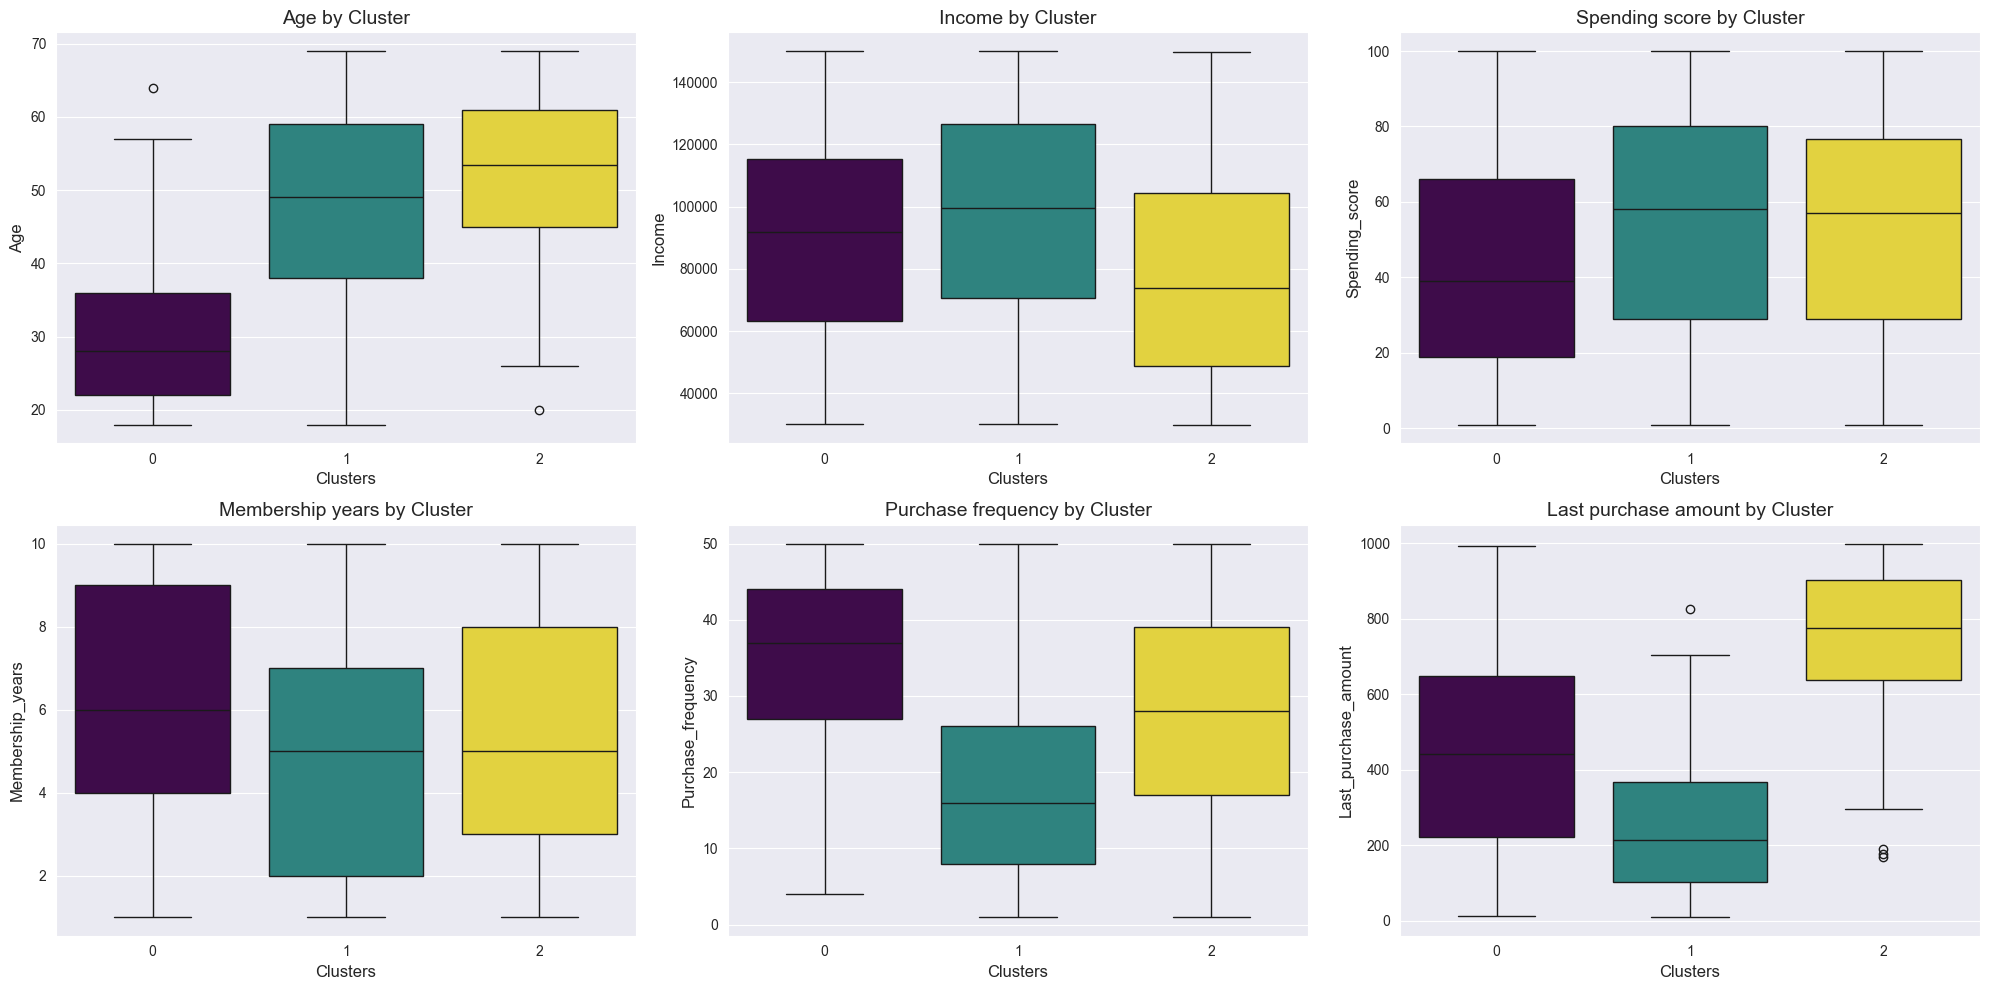

In [21]:
numeric_columns = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

# Create box plots for each numeric column grouped by clusters
plt.figure(figsize=(20, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Create a 2-row, 3-column grid of subplots
    sns.boxplot(x='Clusters', y=column, data=data2, hue='Clusters', palette='viridis', legend=False)
    plt.title(f"{' '.join(column.split('_')).capitalize()} by Cluster", fontsize=14)
    plt.xlabel('Clusters', fontsize=12)
    plt.ylabel(column.capitalize(), fontsize=12)

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

In [22]:
category_distribution = data.groupby(['Clusters', 'preferred_category']).size().unstack(fill_value=0)
category_distribution

preferred_category,Clothing,Electronics,Groceries,Home & Garden,Sports
Clusters,,,,,
0,51,70,65,72,67
1,60,68,71,57,69
2,59,77,63,77,74


#### Most Preferred Categories by Cluster

- **Cluster 0:** Most preferred category is Home & Garden, with 72 customers.
- **Cluster 1:** Most preferred category is Groceries, with 71 customers.
- **Cluster 2:** Most preferred category is Electronics and Home & Garden, with 77 customers.

In [23]:
gender_distribution = data.groupby(['Clusters', 'gender']).size().unstack(fill_value=0)
gender_distribution

gender,Female,Male,Other
Clusters,,,
0,102,139,84
1,124,98,103
2,90,120,140


### Cluster Insights

#### Cluster 0: Younger, Loyal Customers with Moderate Income
- **Age:** ~30 years
- **Gender:** Male
- **Income:** Moderate (~90,800 dollars)
- **Spending Score:** Average (~43)
- **Membership Years:** High (~6 years)
- **Purchase Frequency:** Moderate (~35 purchases)
- **Last Purchase Amount:** Moderate (~$449)
- **Cluster Size:** 325 customers
- **Observation:** Younger customers with moderate loyalty, frequent purchases, and average spending.

#### Cluster 1: Middle-Aged, High-Income Customers
- **Age:** ~48 years
- **Gender:** Female
- **Income:** High (~97,625 dollars)
- **Spending Score:** High (~55)
- **Membership Years:** Low (~4.8 years)
- **Purchase Frequency:** Low (~18 purchases)
- **Last Purchase Amount:** Low (~$249)
- **Cluster Size:** 325 customers
- **Observation:** Middle-aged, high-income earners who are less engaged in spending or frequent purchases.


#### Cluster 2: Older, High-Spending Customers
- **Age:** ~52 years
- **Gender:** Other
- **Income:** Lower (~ 77,892 dollars)
- **Spending Score:** High (~54)
- **Membership Years:** Moderate (~5.5 years)
- **Purchase Frequency:** Lower (~27 purchases)
- **Last Purchase Amount:** High (~$757)
- **Cluster Size:** 350 customers
- **Observation:** Older customers with fewer purchases but high spending, likely valuing quality over quantity.

### Business Recommendations

#### Cluster 0: Younger, Loyal Customers with Moderate Income
  - Create targeted campaigns around affordable, trendy, and space-saving home decor that appeals to younger customers on Social Media platforms like Instagram.
  - Moderate purchasers can be encouraged to spend more by providing tangible benefits for frequent transactions. Implementing loyalty rewards or points systems can incentivize repeat purchases and foster ongoing engagement.
  - Since younger customers are more likely to be renters or new homeowners, Promote items that resonate with renters or first-time homeowners. 


### Cluster 1: Middle-Aged, High-Income Customers
  - Introduce bundle deals or subscription services for Groceries to increase purchase frequency.
  - High-income individuals prioritize time savings and personalized experiences. Free delivery or curated bundles remove friction from the purchasing process, making it more attractive.
  - High-income customers may not shop as frequently due to busy schedules. Reminders and urgency-driven tactics (like limited-time offers) encourage them to act sooner rather than delaying purchases.

### Cluster 2: Older, High-Spending Customers
  - Develop premium marketing campaigns for Electronics and Home & Garden products to cater to their high spending habits.
  - High spenders often prefer exclusivity. Offering memberships or early access makes them feel valued and can create anticipation for new launches, keeping them engaged despite lower purchase frequency.
  - Use personalized email marketing to highlight high-value items that align with their preferences.

##### By leveraging these insights, we can implement data-driven strategies to better cater to their customers, maximize engagement, and drive sustainable growth